In [1]:
# standard imports
import os
from pathlib import Path
import glob
import pandas as pd
import numpy as np

#plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook'])

# unique imports
import s3fs #access data from the AWS s3 bucket

In [2]:
# Uses AWS credentials on machine
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  
      
# contents inside /depths     
flist = fs.ls(f'{bucket}/tutorial-data/core-datasets/depths') 

# show list of files
print('File list is: ', flist)

File list is:  ['snowex-data/tutorial-data/core-datasets/depths/SnowEx2020_SnowDepths_COGM_alldepths_v01.csv']


In [3]:
# open depth data file, and create pandas dataframe
with fs.open(flist[0], 'rb') as f: 
    
    df = pd.read_csv(f, sep=',', header=0, parse_dates=[[2,3]]) #parse the date[2] and time[3] columns such that they are read in as datetime dtypes
    
print('file has been read, and is ready to use.')

file has been read, and is ready to use.


In [4]:
# check data types for each column
df.dtypes

Date (yyyymmdd)_Time (hh:mm, local, MST)                           datetime64[ns]
Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)            object
ID                                                                          int64
PitID                                                                      object
Longitude                                                                 float64
Latitude                                                                  float64
Easting                                                                   float64
Northing                                                                  float64
Depth (cm)                                                                  int64
elevation (m)                                                             float64
equipment                                                                  object
Version Number                                                              int64
dtype: object

In [5]:
# rename some columns for ease further down
df.rename(columns = {
    'Measurement Tool (MP = Magnaprobe; M2 = Mesa 2; PR = Pit Ruler)':'Measurement Tool', 
    'Date (yyyymmdd)_Time (hh:mm, local, MST)': "Datetime"},
          inplace = True)

# set up filter for IOP date range
start = pd.to_datetime('1/28/2020') #first day of GM IOP campaign
end   = pd.to_datetime('2/12/2020') #last day of GM IOP campaign

# filter the IOP date range
df = df[(df['Datetime'] >= start) & (df['Datetime'] <= end)]

print('DataFrame shape is: ', df.shape)
df.head()

DataFrame shape is:  (36388, 12)


,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
0,2020-01-28 11:48:00,MP,100000,8N58,-108.13515,39.03045,747987.62,4324061.71,94,3148.2,CRREL_B,1
1,2020-01-28 11:48:00,MP,100001,8N58,-108.13516,39.03045,747986.75,4324061.68,74,3148.3,CRREL_B,1
2,2020-01-28 11:48:00,MP,100002,8N58,-108.13517,39.03045,747985.89,4324061.65,90,3148.2,CRREL_B,1
3,2020-01-28 11:48:00,MP,100003,8N58,-108.13519,39.03044,747984.19,4324060.49,87,3148.6,CRREL_B,1
4,2020-01-28 11:48:00,MP,100004,8N58,-108.13519,39.03042,747984.26,4324058.27,90,3150.1,CRREL_B,1


In [6]:
# group data by the measurement tool 
gb = df.groupby('Measurement Tool', as_index=False).mean().round(1)

# show mean snow depth from each tool
gb[['Measurement Tool', 'Depth (cm)']]

,Measurement Tool,Depth (cm)
0,M2,97.0
1,MP,94.8
2,PR,94.6


#### Grouped data by the snow pit ID

In [15]:
# group data by the measurement tool 
gb1 = df.groupby('PitID', as_index=False).mean().round(1)

# show mean snow depth from each tool
gb1[['PitID', 'Depth (cm)']]

,PitID,Depth (cm)
0,1C1,90.4
1,1C14,83.2
2,1C7,91.1
3,1C8,91.2
4,1N1,66.0
...,...,...
143,9S40,86.9
144,9S51,86.6
145,FL2A,112.0
146,GML,115.0


In [14]:
# group data by the measurement tool 
gb2 = df.groupby('PitID', as_index=False)

# show mean snow depth from each tool
gb2[['PitID', 'Measurement Tool']]

In [18]:
print('List of Measurement Tools: ', df['Measurement Tool'].unique())

List of Measurement Tools:  ['MP' 'M2' 'PR']


In [19]:
print('List of Snow Pits: ', df['PitID'].unique())

List of Snow Pits:  ['8N58' '7N57' '8N55' '3N53' '4N2' '2N4' '1N6' '5N10' '6N18' '2S25' '5S24'
 '8S30' '2S36' '6C37' '1S1' '2S3' '3S5' '6S19' '4N27' '6N31' '5C20' '9C19'
 '8N34' '6N36' '5C21' '9N29' '8C25' '2C33' '2N12' '1C1' '2C3' '2C6' '1C8'
 '2C2' '2C4' '1C7' '2C9' '6C10' '1C14' '8C22' '6C24' '9C28' '4C30' '8C26'
 '8S28' '9N44' '8N45' '6N46' '5N50' '2N48' '2S37' '9S39' '2S38' '9S40'
 '6C34' '1S8' '2S11' '3S14' '5S21' '5S49' '2S46' '6S44' '5S42' '3S52'
 '6S34' '3S33' '5S29' '2S27' '7N40' '8N37' '9N42' '9N43' '2S9' '6S15'
 '6S22' '8C18' '9C16' '8C11' '2S10' '1S13' '2S20' '7S23' '6S32' '2N15'
 '9N30' '8N33' '2N13' '1S2' '2S7' '2S16' '1S17' '1N1' '2N8' '6N16' '3N26'
 '9N28' 'TLSFL2A' '6N17' '5N11' '2S45' '8S41' '9N39' '8N35' '2N49' '1N3'
 '2N14' '2N21' '1N23' '1S12' '2S6' '1N7' '1N5' '5N19' '3N22' '8N25' '2S48'
 '5S43' '3S47' '9S51' '2S35' '5S31' '9N56' '8N54' '8N51' '9N47' '8N52'
 '8C36' '8C35' '8C29' '1N20' '8N9' '7S50' '6S53' '9N59' '9C17' '7C15'
 '8N38' '5N41' '2S4' '8S18' '8C31' '3

In [21]:
r1 = df.loc[df['Measurement Tool'] == 'MP']
print('DataFrame shape is: ', r1.shape)
r1.head()

DataFrame shape is:  (31850, 12)


,Datetime,Measurement Tool,ID,PitID,Longitude,Latitude,Easting,Northing,Depth (cm),elevation (m),equipment,Version Number
0,2020-01-28 11:48:00,MP,100000,8N58,-108.13515,39.03045,747987.62,4324061.71,94,3148.2,CRREL_B,1
1,2020-01-28 11:48:00,MP,100001,8N58,-108.13516,39.03045,747986.75,4324061.68,74,3148.3,CRREL_B,1
2,2020-01-28 11:48:00,MP,100002,8N58,-108.13517,39.03045,747985.89,4324061.65,90,3148.2,CRREL_B,1
3,2020-01-28 11:48:00,MP,100003,8N58,-108.13519,39.03044,747984.19,4324060.49,87,3148.6,CRREL_B,1
4,2020-01-28 11:48:00,MP,100004,8N58,-108.13519,39.03042,747984.26,4324058.27,90,3150.1,CRREL_B,1


In [22]:
pd.DataFrame()

""


In [24]:
# MP snow depths from Grand Mesa IOP
r1 = df.loc[df['Measurement Tool'] == 'MP'] 
print( 'DataFrame is back to only MP depths')

DataFrame is back to only MP depths


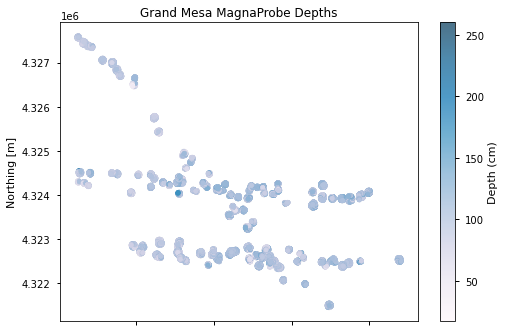

In [26]:
# plot MegnaProbe depths 
ax = r1.plot(x='Easting', y='Northing', c='Depth (cm)', kind='scatter', alpha=0.7, colorbar=True, colormap='PuBu', legend=True)
ax.set_title('Grand Mesa MagnaProbe Depths')
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
plt.show()

Text(0, 0.5, 'Frequency')

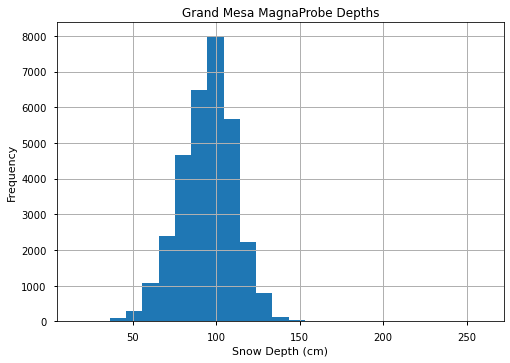

In [27]:
# plot histogram of MagnaProbe depths
ax = r1['Depth (cm)'].plot.hist(bins=25)
ax.grid()
ax.set_title('Grand Mesa MagnaProbe Depths')
ax.set_xlabel('Snow Depth (cm)')
ax.set_ylabel('Frequency')

In [28]:
# Uses AWS credentials on machine
fs = s3fs.S3FileSystem() 

# which data bucket?
bucket = 'snowex-data'  
      
# contents inside /pits     
flist = fs.ls(f'{bucket}/tutorial-data/core-datasets/pits/')

# which files do we want?
suffix='.csv'

# list comprehension to get .csv files (not .xlsx or .jpgs)
csv_files = [filename for filename in flist if filename.endswith(suffix)]
csv_files[:5]

['snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_LWC_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_density_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_siteDetails_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_stratigraphy_v01.csv',
 'snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_20200128_1N6_temperature_v01.csv']

In [29]:
# what files would you like to find?
parameter = 'LWC'
pitID = '1N6'
date = '20200128'

In [30]:
with fs.open('/snowex-data/tutorial-data/core-datasets/pits/SnowEx20_SnowPits_GMIOP_{}_{}_{}_v01.csv'.format(date, pitID, parameter), 'rb') as f:
    
    t = pd.read_csv(f, header=7)
t

,# Top (cm),Bottom (cm),Avg Density (kg/m3),Permittivity A,Permittivity B,LWC-vol A (%),LWC-vol B (%)
0,92.0,82.0,182.0,1.350,1.350,0.5,0.5
1,82.0,72.0,217.5,1.380,1.380,0.4,0.4
2,72.0,62.0,232.5,1.374,1.374,0.2,0.2
3,62.0,52.0,237.5,1.380,1.380,0.2,0.2
4,52.0,42.0,244.5,1.386,1.386,0.2,0.2
5,42.0,32.0,248.5,1.348,1.348,0.0,0.0
6,32.0,22.0,279.5,1.432,1.432,0.1,0.1
7,22.0,12.0,276.0,1.441,1.441,0.2,0.2
8,17.0,7.0,268.5,1.333,1.333,0.0,0.0


Text(0, 0.5, 'Snow Bottom (cm)')

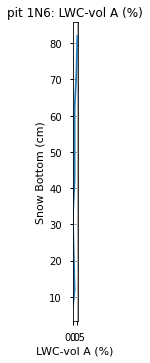

In [32]:
# plot LWC
ax = t.plot(x='LWC-vol A (%)',y='Bottom (cm)', legend=False)
ax.set_aspect(0.4)
ax.grid()
ax.set_title('pit {}: LWC-vol A (%)'.format(pitID))
ax.set_xlabel('LWC-vol A (%)')
ax.set_ylabel('Snow Bottom (cm)')